#### Data Cleaning 3

Methods for dealing with outliers.

In [13]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

### Import data

In [3]:
# read in us education data 
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [4]:
# glance at the dataframe
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [25]:
education_df.columns[3:20]

Index(['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE',
       'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G'],
      dtype='object')

In [8]:
# fill in nan values
for col in education_df.columns[3:30]:
    education_df.loc[:, col] = education_df.loc[:, col].fillna(education_df.loc[:, col].mean())

In [9]:
# verify that the fillna above worked properly
education_df.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

### 1. Consider the two variables: *TOTAL_REVENUE* and *TOTAL_EXPENDITURE*. Do these variables have outlier values?


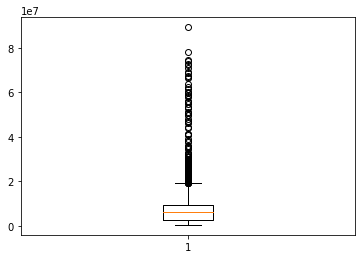

In [40]:
plt.boxplot(education_df.TOTAL_REVENUE);

Yes, with the whiskers set at 1.5 a number of outliers show up

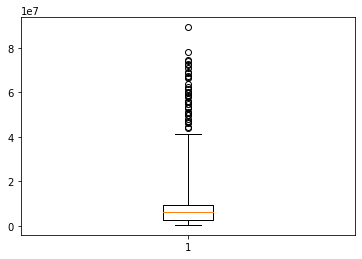

In [38]:
plt.boxplot(education_df.TOTAL_REVENUE, whis=5);

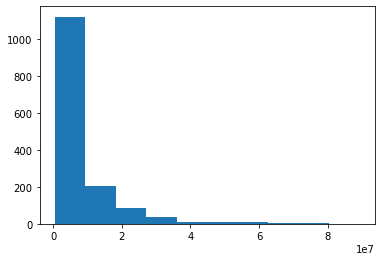

In [43]:
# visualize data distribution
plt.hist(education_df.TOTAL_REVENUE);

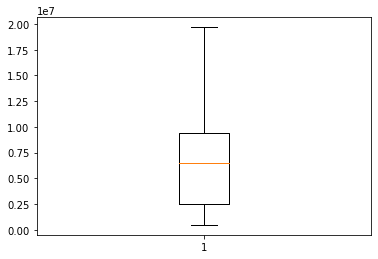

In [41]:
plt.boxplot(education_df.TOTAL_EXPENDITURE);

Yes, with the whiskers set at 1.5 a number of outliers show up

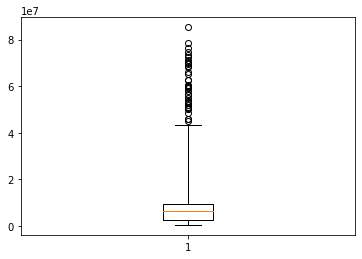

In [39]:
plt.boxplot(education_df.TOTAL_EXPENDITURE, whis=5);

Yes, even with the whiskers set at 5 a number of outliers still show up

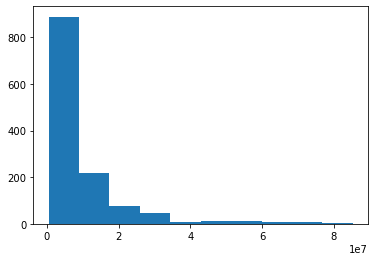

In [5]:
# visualize data distribution
plt.hist(education_df.TOTAL_EXPENDITURE);

Total expenditure has a slightly less sharp tail than total revenue.  But still the data is highly skewed.

### 2. If you detect outliers in the *TOTAL_REVENUE* and *TOTAL_EXPENDITURE* variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

#### Use Z-scores to identify outliers at various thresholds

In [42]:
from scipy.stats import zscore

z_scores = zscore(education_df.TOTAL_REVENUE)
for threshold in range(1,7):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([   4,   32,   44,   56,   85,   91,   96,  108,  114,  127,  137,
        143,  148,  150,  161,  166,  170,  179,  187,  190,  196,  201,
        213,  218,  222,  231,  239,  241,  244,  247,  252,  264,  269,
        273,  282,  290,  292,  295,  299,  304,  316,  321,  325,  334,
        342,  344,  347,  350,  355,  367,  373,  377,  386,  394,  396,
        399,  402,  407,  420,  425,  429,  438,  447,  449,  452,  455,
        460,  472,  477,  478,  481,  482,  491,  499,  501,  504,  507,
        512,  524,  529,  530,  533,  542,  550,  552,  555,  559,  564,
        576,  581,  582,  585,  594,  595,  603,  605,  608,  611,  616,
        628,  633,  634,  637,  645,  646,  654,  656,  659,  662,  665,
        668,  680,  685,  686,  689,  690,  697,  698,  706,  708,  711,
        714,  719,  722,  731,  735,  737,  738,  741,  742,  749,  750,
        758,  760,  761,  763,  766,  771,  775,  784,  789,  790,  

#### Use Interquartile Range (IQR) method to identify outliers at various thresholds

In [12]:
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
q75, q25 = np.percentile(education_df.TOTAL_REVENUE, [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,7,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((education_df.TOTAL_REVENUE > max_val) 
                      | (education_df.TOTAL_REVENUE < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 194
The score threshold is: 1.5
Number of outliers is: 150
The score threshold is: 2.0
Number of outliers is: 121
The score threshold is: 2.5
Number of outliers is: 93
The score threshold is: 3.0
Number of outliers is: 66
The score threshold is: 3.5
Number of outliers is: 51
The score threshold is: 4.0
Number of outliers is: 45
The score threshold is: 4.5
Number of outliers is: 42
The score threshold is: 5.0
Number of outliers is: 39
The score threshold is: 5.5
Number of outliers is: 36
The score threshold is: 6.0
Number of outliers is: 33
The score threshold is: 6.5
Number of outliers is: 27


#### Use Winsorization to cap outliers

In [22]:
# one-way winsorization applied to the highest end
# of the value distribution since there are a lot of high
# values, we set the values of the outliers to the 
# value of the 85th percentile. 
winsorized_views = winsorize(education_df.TOTAL_REVENUE, (0, 0.15))

winsorized_views

masked_array(data=[2678885.        , 1049591.        , 3258079.        ,
                   ..., 9092081.85859375, 9092081.85859375,
                   9092081.85859375],
             mask=False,
       fill_value=1e+20)

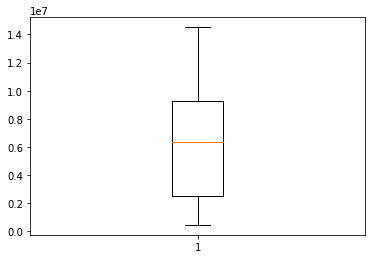

In [23]:
plt.boxplot(winsorized_views);

Using Windsorize, I had to set the percentil to the 85th in order to capture all outliers for revenue

In [39]:
# modify outliers in the dataset directly
education_df.TOTAL_REVENUE = winsorize(education_df.TOTAL_REVENUE, (0, 0.15))

In [36]:
# one-way winsorization applied to the highest end
# of the value distribution since there are a lot of high
# values, we set the values of the outliers to the 
# value of the 90th percentile. 
winsorized_views = winsorize(education_df.TOTAL_EXPENDITURE, (0, 0.1))

winsorized_views

masked_array(data=[2653798.     ,  972488.     , 3401580.     , ...,
                   9196680.86875, 9196680.86875, 9196680.86875],
             mask=False,
       fill_value=1e+20)

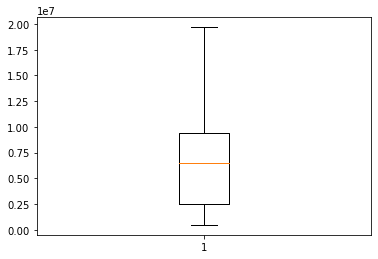

In [37]:
plt.boxplot(winsorized_views);

Using Windsorize, I had to set the percentil to the 90th in order to capture all outliers for total expenditure

In [40]:
# modify outliers in the dataset directly
education_df.TOTAL_EXPENDITURE = winsorize(education_df.TOTAL_EXPENDITURE, (0, 0.1))

#### Use Transformation on the outliers

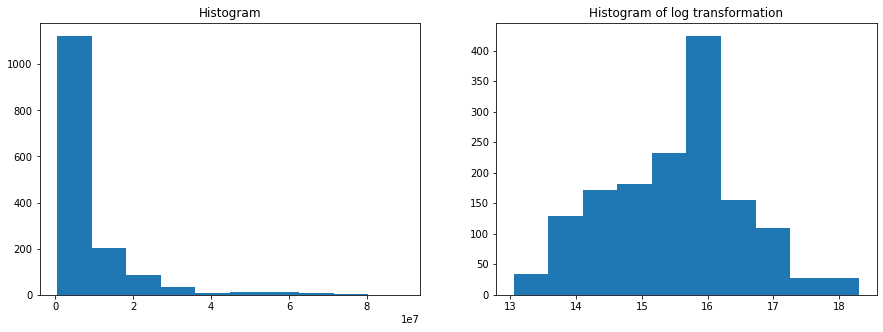

In [38]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(education_df.TOTAL_REVENUE)
plt.title("Histogram")

plt.subplot(1,2,2)
plt.hist(np.log(education_df.TOTAL_REVENUE))
plt.title("Histogram of log transformation")
plt.show()

### 3. Create another variable by subtracting the original *TOTAL_EXPENDITURE* from *TOTAL_REVENUE* (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

### 4. Now create another variable by subtracting the *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. This time, use the outlier eliminated versions of *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. In this newly created variable, can you find any outliers? If so, eliminate them.

### 5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

### 6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?